# CSI4142 - Group 48 - Assignment 3 - Part 1

---

## Introduction
In this report, we will conduct an empirical study to evaluate a linear regression approach on a regression task. This will be conducted on the ___ daatset. For this study, we will follow the following steps:

1. Clean the data 
2. Encode categorical features to transform them into numerical features 
3. Conduct an EDA (Exploritory Data Analysis) to visualize data and find outliers in the features using LOF (Local Outlier Factor)
4. (Optional) Explore the LinearRegression method suggested in scikit-learn (or other packages)
5. Program a feature aggregator to create 2 additional features
6. Split the data into train, validation, and test sets, choose an evaluation metric (e.g., MSE, RMSE, R²), establish a baseline using linear regression without outlier removal or feature aggregation, perform 4-fold cross-validation on different system variations, select the best model, and evaluate it on the untouched test set.
7. Analyize the results
8. Discuss the outliers and feature aggregation, as well as the results on the unseen test set compare to the cross-validation results


#### Group 48 Members
- Ali Bhangu - 300234254
- Justin Wang - 300234186

<br>

---

## Dataset Descriptions

### Car Detail Dataset

- **Dataset Name:** Vehicle Dataset
- **Author:** Nehal Birla, Nishant Verma, Nikhil Kushwaha (Kaggle)
- **Purpose:** This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

##### Dataset Shape
- **Rows:** 4339 Rows
- **Columns:** 8 Columns 

#### Features & Descriptions
| Feature Name       | Data Type  | Category    | Description |
|--------------------|------------|-------------|-------------|
| `name`             | String     | Categorical | Name of the cars |
| `year`             | Float      | Numerical   | Year of the car when it was bought |
| `selling_price`    | Float      | Numerical   | Price at which the car is being sold |
| `km_driven`        | Float      | Numerical   | Number of Kilometres the car is driven |
| `fuel`             | String     | Categorical | Fuel type of car (petrol / diesel / CNG / LPG / electric) |
| `seller_type`      | String     | Categorical | Tells if a Seller is Individual or a Dealer |
| `transmission`     | String     | Categorical | Gear transmission of the car (Automatic/Manual) |
| `owner`            | String     | Categorical | Number of previous owners of the car. |

---

In [33]:
# Importing the required Python libraries
import numpy as npy
import pandas as pd
from fuzzywuzzy import fuzz
import os as os
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [46]:
# Define paths
csv_path = "CAR.csv"

# Load dataset
carSet = pd.read_csv(csv_path)
print("Dataset loaded successfully.")
carSet.tail()

print(carSet.head())

Dataset loaded successfully.
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


---
### a) Clean Data

In [ ]:
# TBD

---
### b) Categorical feature encoding

In [130]:
print(f"Employee data : \n{carSet.head()}")

categorical_columns = carSet.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(carSet[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([carSet, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_encoded.head()}")


display(df_encoded.head())


Employee data : 
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
Encoded Employee data : 
   year  selling_price  km_driven  name_Ambassador CLASSIC 1500 DSL AC  \
0  2007          60000      70000                                  0.0   
1  2007         135000      50000                                  0.0   
2  2012         600000     100000                  

,year,selling_price,km_driven,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2007,135000,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2012,600000,100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2017,250000,46000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2014,450000,141000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


---
### c) EDA and Outlier detection

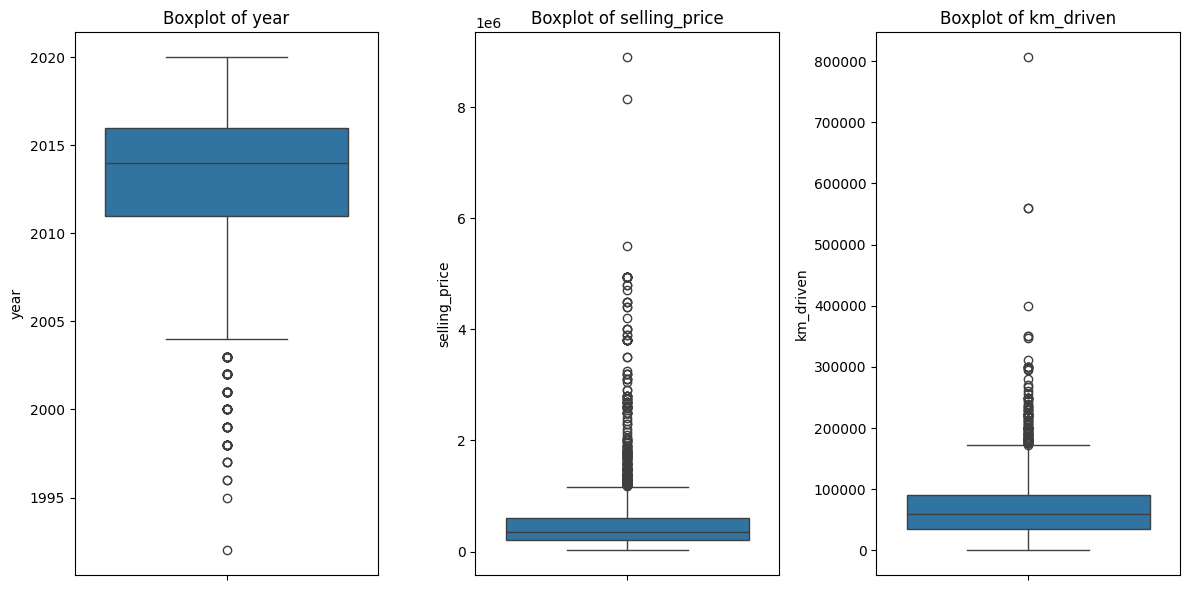

In [131]:
# Visualizing numerical features using boxplots to detect potential outliers
numerical_columns = ["year", "selling_price", "km_driven"]
plt.figure(figsize=(12, 6))

# Creating boxplots for each numerical feature we have
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(f"Boxplot of {col}")

# Proceeding to display the boxplots
plt.tight_layout()
plt.show()

In [ ]:
# Selecting relevant numerical columns for outlier detection
outlier_columns = ["selling_price", "km_driven"]

# Applying LOF to detect outliers via the LOF from Scikit, also assuming 5% outliers. 
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  
outlier_labels = lof.fit_predict(df_encoded[outlier_columns])

# Identifying outliers (-1 indicates an outlier)
df_encoded["outlier"] = outlier_labels

display(df_encoded.tail())

# Count of detected outliers
outlier_counts = df_encoded["outlier"].value_counts()
outlier_counts

print(f"Outlier counts: \n{outlier_counts}")


      year  selling_price  km_driven  name_Ambassador CLASSIC 1500 DSL AC  \
4335  2014         409999      80000                                  0.0   
4336  2014         409999      80000                                  0.0   
4337  2009         110000      83000                                  0.0   
4338  2016         865000      90000                                  0.0   
4339  2016         225000      40000                                  0.0   

      name_Ambassador Classic 2000 Dsz  \
4335                               0.0   
4336                               0.0   
4337                               0.0   
4338                               0.0   
4339                               0.0   

      name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
4335                                        0.0                    0.0   
4336                                        0.0                    0.0   
4337                                        0.0               

In [166]:
# Compute mean of 'selling_price' using non-missing data
mean_Price = df_encoded['selling_price'].mean()

# Replace 'selling_price' with mean_Price where 'outlier' is -1
df_encoded.loc[df_encoded['outlier'] == -1, 'selling_price'] = mean_Price

# Print updated DataFrame
print("=== After Imputing Missing 'selling_price' (first few rows) ===")
display(df_encoded.tail(20))

=== After Imputing Missing 'selling_price' (first few rows) ===


,year,selling_price,km_driven,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,...,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,outlier
4320,2008,114999.000000,66782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4321,2006,75000.000000,130000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
4322,2013,500000.000000,120000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
4323,2014,195000.000000,75000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4324,2015,155000.000000,40000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
4325,2000,65000.000000,90000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4326,2005,504621.306667,150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1
4327,2015,190000.000000,60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4328,2012,200000.000000,112198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4329,2010,160000.000000,60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


## d) Linear Regression 

For this section of the assignment, we are utilizing Scikit-Learn's LinearRegression method, we were previously exposed to this in Assignment 2 Part 2, and have opted to re-use it after developing a familiarity. 

In [ ]:
# Regression imputation on 'area'

# Train a linear regression model to predict area
reg_model = LinearRegression()

---
## e) Feature Engineering

Feature engineering can be described as creating new features from existing ones to improve prediction accuracy, we have thus decided on the following features: 

1. Car Age -> car_age = 2025 - year 
- This feature will help represent the age of the car in relation to the modern day, which is a strong predictor of its depriciation over time. 
2. Feature Aggregration -> km_per_year = km_driven/ car_age
- This feature provides a look into the cars usage and general wear and tear, year in and year out. 




In [168]:
df_encoded["car_age"] = 2025 - df_encoded["year"]
df_encoded["km_driven_per_year"] = df_encoded["km_driven"] // df_encoded["car_age"]

display(df_encoded.head())

,year,selling_price,km_driven,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,...,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,outlier,car_age,km_driven_per_year
0,2007,515000.840228,70000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,18,3888
1,2007,515000.840228,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,18,2777
2,2012,600000.000000,100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,13,7692
3,2017,250000.000000,46000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,8,5750
4,2014,450000.000000,141000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,11,12818
